In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# df_cs = pd.read_csv('customers_senior.csv')
# df_rs = pd.read_csv('rooms_senior.csv')
df_bs = pd.read_csv('bookings_senior.csv')
df_ps = pd.read_csv('payments_senior.csv')
# df_ss = pd.read_csv('services_senior.csv')
df_sus = pd.read_csv('service_usage_senior.csv')

In [6]:
df_bs.head()

,booking_id,customer_id,room_id,check_in,check_out,status,created_at
0,1,198,165,2023-12-26,2024-01-02,Cancelled,2023-12-26
1,2,466,32,2023-09-02,2023-09-12,Pending,2023-09-02
2,3,131,15,2024-06-03,2024-06-07,Pending,2024-06-03
3,4,138,17,2023-05-26,2023-05-30,Cancelled,2023-05-26
4,5,50,178,2024-04-19,2024-04-28,Confirmed,2024-04-19


In [7]:
df_ps.head()

,payment_id,booking_id,amount,payment_method,payment_date
0,1,1172,1858,Credit Card,2023-12-20
1,2,2311,1275,PayPal,2024-05-23
2,3,651,216,Bank Transfer,2023-11-28
3,4,3016,1407,Crypto,2024-12-28
4,5,3516,1961,PayPal,2023-03-11


In [8]:
df_sus.head()

,usage_id,booking_id,service_id,quantity,total_price
0,1,4536,8,5,480
1,2,4689,9,2,212
2,3,4754,8,1,96
3,4,3544,3,3,390
4,5,3790,6,3,81


In [13]:
df = df_bs.merge(df_ps, on="booking_id", how="left")
df = df.merge(df_sus[['booking_id', 'quantity', 'total_price']], on="booking_id", how="left")
df.head(5)

,booking_id,customer_id,room_id,check_in,check_out,status,created_at,payment_id,amount,payment_method,payment_date,quantity,total_price
0,1,198,165,2023-12-26,2024-01-02,Cancelled,2023-12-26,NaN,NaN,NaN,NaN,4.0,496.0
1,1,198,165,2023-12-26,2024-01-02,Cancelled,2023-12-26,NaN,NaN,NaN,NaN,3.0,246.0
2,2,466,32,2023-09-02,2023-09-12,Pending,2023-09-02,NaN,NaN,NaN,NaN,4.0,328.0
3,2,466,32,2023-09-02,2023-09-12,Pending,2023-09-02,NaN,NaN,NaN,NaN,2.0,248.0
4,2,466,32,2023-09-02,2023-09-12,Pending,2023-09-02,NaN,NaN,NaN,NaN,4.0,108.0


In [14]:
cols = ['customer_id', 'booking_id', 'check_in', 'check_out', 'amount', 'quantity', 'total_price']
df = df[cols]

In [15]:
df.head()

,customer_id,booking_id,check_in,check_out,amount,quantity,total_price
0,198,1,2023-12-26,2024-01-02,NaN,4.0,496.0
1,198,1,2023-12-26,2024-01-02,NaN,3.0,246.0
2,466,2,2023-09-02,2023-09-12,NaN,4.0,328.0
3,466,2,2023-09-02,2023-09-12,NaN,2.0,248.0
4,466,2,2023-09-02,2023-09-12,NaN,4.0,108.0


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9457 entries, 0 to 9456
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   customer_id  9457 non-null   int64  
 1   booking_id   9457 non-null   int64  
 2   check_in     9457 non-null   object 
 3   check_out    9457 non-null   object 
 4   amount       4963 non-null   float64
 5   quantity     8011 non-null   float64
 6   total_price  8011 non-null   float64
dtypes: float64(3), int64(2), object(2)
memory usage: 517.3+ KB


In [17]:
df[['amount', 'quantity', 'total_price']] = df[['amount', 'quantity', 'total_price']].fillna(0)

In [19]:
df.head()

,customer_id,booking_id,check_in,check_out,amount,quantity,total_price
0,198,1,2023-12-26,2024-01-02,0.0,4.0,496.0
1,198,1,2023-12-26,2024-01-02,0.0,3.0,246.0
2,466,2,2023-09-02,2023-09-12,0.0,4.0,328.0
3,466,2,2023-09-02,2023-09-12,0.0,2.0,248.0
4,466,2,2023-09-02,2023-09-12,0.0,4.0,108.0


In [20]:
df['check_in'] = pd.to_datetime(df['check_in'], format='%Y-%m-%d')
df['check_out'] = pd.to_datetime(df['check_out'], format='%Y-%m-%d')

df['stay_duration'] = (df['check_out'] - df['check_in']).dt.days
df['stay_duration'] = df['stay_duration'].apply(lambda x: 1 if x == 0 else x)
df['total_amount'] = df['amount'] + df['total_price']

In [21]:
df.head()

,customer_id,booking_id,check_in,check_out,amount,quantity,total_price,stay_duration,total_amount
0,198,1,2023-12-26,2024-01-02,0.0,4.0,496.0,7,496.0
1,198,1,2023-12-26,2024-01-02,0.0,3.0,246.0,7,246.0
2,466,2,2023-09-02,2023-09-12,0.0,4.0,328.0,10,328.0
3,466,2,2023-09-02,2023-09-12,0.0,2.0,248.0,10,248.0
4,466,2,2023-09-02,2023-09-12,0.0,4.0,108.0,10,108.0


In [26]:
df_result = df.groupby('customer_id').agg(
    total_bookings=('booking_id', 'nunique'),
    total_stay_duration=('stay_duration', 'sum'),
    total_amount=('total_amount', 'sum'),
    total_quantity_service_usage=('quantity', 'sum')
).reset_index()

df_result

,customer_id,total_bookings,total_stay_duration,total_amount,total_quantity_service_usage
0,1,12,95,11957.0,34.0
1,2,7,90,9695.0,29.0
2,3,6,52,6125.0,25.0
3,4,9,153,6668.0,46.0
4,5,5,49,1984.0,7.0
...,...,...,...,...,...
495,496,15,260,32501.0,101.0
496,497,11,126,4482.0,44.0
497,498,11,173,11163.0,50.0
498,499,14,279,38794.0,102.0


In [28]:
features = ['total_bookings', 'total_stay_duration', 'total_amount', 'total_quantity_service_usage']
X = df_result[features]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

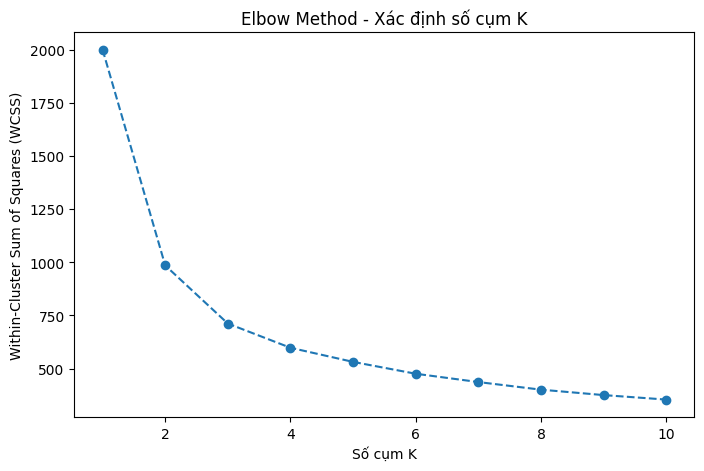

In [30]:
wcss = []
K_range = range(1, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)  # inertia_ là tổng khoảng cách từ điểm đến tâm cụm

plt.figure(figsize=(8, 5))
plt.plot(K_range, wcss, marker='o', linestyle='--')
plt.xlabel('Số cụm K')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.title('Elbow Method - Xác định số cụm K')
plt.show()

In [32]:
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
df_result['cluster'] = kmeans.fit_predict(X_scaled)
df_result['cluster'] = df_result['cluster'].astype(str)

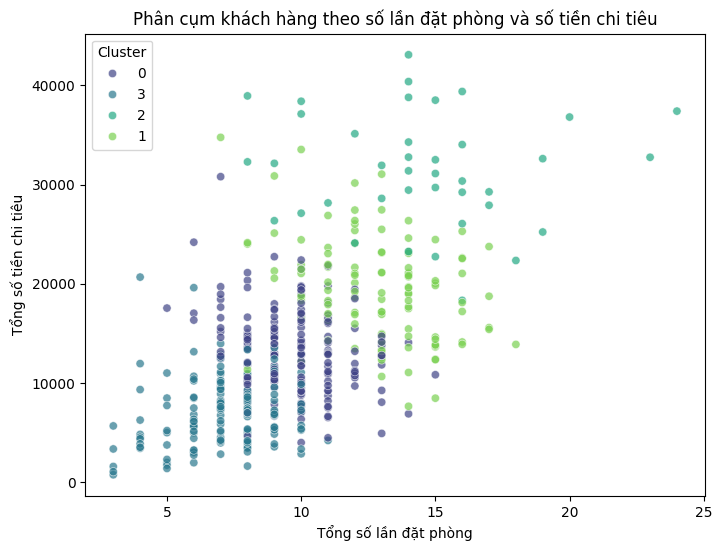

In [34]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df_result['total_bookings'], y=df_result['total_amount'], hue=df_result['cluster'], palette='viridis', alpha=0.7)
plt.xlabel('Tổng số lần đặt phòng')
plt.ylabel('Tổng số tiền chi tiêu')
plt.title('Phân cụm khách hàng theo số lần đặt phòng và số tiền chi tiêu')
plt.legend(title="Cluster")
plt.show()